In [0]:
#import the dependencies
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('new_outputt.csv')

Saving new_outputt.csv to new_outputt.csv


In [0]:
#Look at the data first 7 rows of data
df.head(7)

,chromosome number,start position,end position,number of bisulfite converted reads,number of bisulfite un-converted reads,fraction of reads have dna methylation
0,15,17000186,17000188,14,10,0.416667
1,15,17000252,17000254,3,32,0.914286
2,15,17000408,17000410,27,55,0.670732
3,15,17000423,17000425,2,91,0.978495
4,15,17000530,17000532,56,174,0.756522
5,15,17000538,17000540,32,230,0.877863
6,15,17000601,17000603,54,436,0.889796


In [0]:
X = df.iloc[:,[3,4]]
X.head()

,number of bisulfite converted reads,number of bisulfite un-converted reads
0,14,10
1,3,32
2,27,55
3,2,91
4,56,174


In [0]:
y = df.iloc[:,5]
y.head()

0    0.416667
1    0.914286
2    0.670732
3    0.978495
4    0.756522
Name: fraction of reads have dna methylation, dtype: float64

In [0]:
X = X.values
y = y.values.reshape(-1,1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = \
train_test_split(X, y, test_size=.2, random_state=0)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

In [0]:
dic_loss = {}
lr_ = []
mae_ = []

lr_list = [.000001,.000005,.00001,.00005,.0001,.0005,.001,.005,.01,.05]
count = 0

for lr in lr_list:
    
    print('lr =',lr)
    count += 1
    print(str(count)+'/'+str(len(lr_list)))

    opt = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    model = Sequential()
    model.add(Dense(6, input_dim=2, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=opt, metrics=['mse','mae'])
    history = model.fit(X_treinamento, y_treinamento, epochs=1, verbose=0, batch_size=25)
    
    previsoes = model.predict(X_teste)

    previsoes = scaler_y.inverse_transform(previsoes)
    #y_teste = scaler_y.inverse_transform(y_teste)

    mae = mean_absolute_error(scaler_y.inverse_transform(y_teste), previsoes)
    
    dic_loss[str(lr)] = history.history['loss']
    lr_.append(lr)
    mae_.append(mae)

lr = 1e-06
1/10
lr = 5e-06
2/10
lr = 1e-05
3/10
lr = 5e-05
4/10
lr = 0.0001
5/10
lr = 0.0005
6/10
lr = 0.001
7/10
lr = 0.005
8/10
lr = 0.01
9/10
lr = 0.05
10/10


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


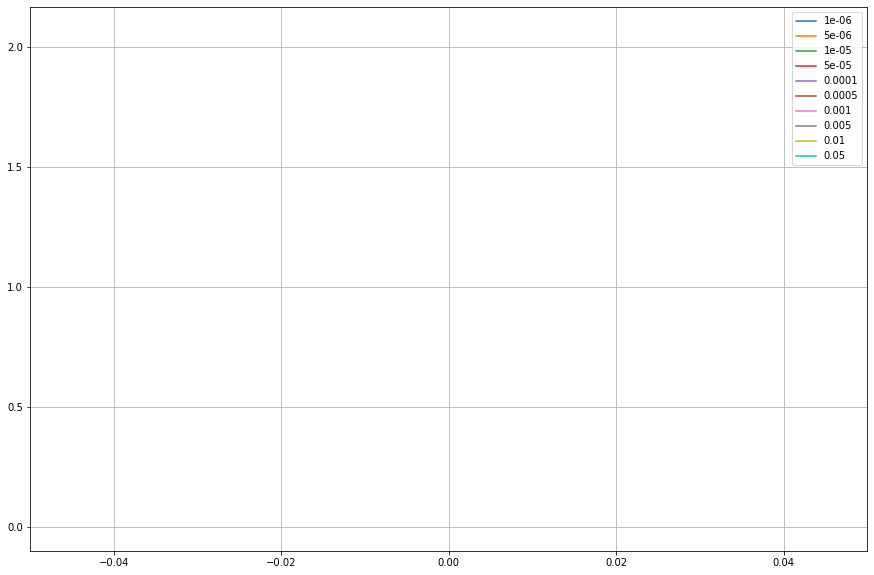

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

df = pd.DataFrame(dic_loss)
df.plot().grid()

In [0]:

#Convert the data into an array
dataset = df.values
dataset

array([[1.50000000e+01, 1.70001860e+07, 1.70001880e+07, 1.40000000e+01,
        1.00000000e+01, 4.16667000e-01],
       [1.50000000e+01, 1.70002520e+07, 1.70002540e+07, 3.00000000e+00,
        3.20000000e+01, 9.14286000e-01],
       [1.50000000e+01, 1.70004080e+07, 1.70004100e+07, 2.70000000e+01,
        5.50000000e+01, 6.70732000e-01],
       ...,
       [1.50000000e+01, 1.01980797e+08, 1.01980799e+08, 5.00000000e+00,
        4.80000000e+01, 9.05660000e-01],
       [1.50000000e+01, 1.01980811e+08, 1.01980813e+08, 1.80000000e+01,
        3.70000000e+01, 6.72727000e-01],
       [1.50000000e+01, 1.01980889e+08, 1.01980891e+08, 3.00000000e+00,
        2.10000000e+01, 8.75000000e-01]])

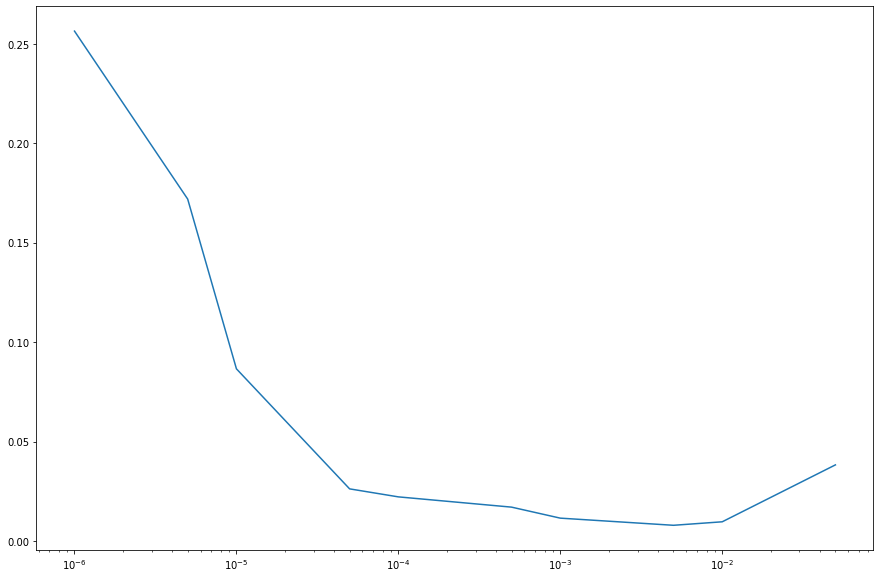

In [41]:
plt.semilogx(lr_, mae_)